In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stdev
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import scipy.stats as stats

In [39]:
dataset = pd.read_csv('surgical-deep-use.csv')
dataset.drop('Unnamed: 0', inplace=True, axis=1)
dataset.drop('Unnamed: 0.1', inplace=True, axis=1)
dataset.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0.0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0.0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0.0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1.0,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,NaN,1,0,0,0,0,0.0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [40]:
dataset.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0.0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0.0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0.0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1.0,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,NaN,1,0,0,0,0,0.0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


# Analisis Exploratorio

### Training

In [41]:
datasetTraining = dataset.sample(frac=0.8, random_state=25)
datasetTraining.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
14088,24.30,43.8,0,0,0,0,0,0.0,0,0,...,0.00,1,0,7.67,9,3,0,-0.32,1,1
12571,28.23,63.2,0,1,2,0,0,0.0,0,0,...,0.00,4,1,11.60,8,1,0,0.77,1,1
9518,41.21,55.9,1,0,1,1,0,1.0,0,0,...,-0.50,1,0,12.05,0,2,0,0.15,1,0
8158,28.98,NaN,1,0,0,1,0,0.0,0,1,...,-1.97,0,1,9.12,8,0,0,-2.25,1,0
12068,39.71,68.3,1,1,8,0,0,0.0,1,0,...,1.55,4,0,15.45,4,1,0,1.65,1,1


### Testing

In [42]:
datasetTest = dataset.drop(datasetTraining.index)
datasetTest.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
8,22.20,58.9,1,0,0,0,0,0.0,0,0,...,0.00,4,0,13.00,10,0,0,0.00,1,0
14,23.08,NaN,0,0,0,0,0,0.0,0,0,...,0.00,3,1,7.77,6,1,0,-1.30,1,0
23,23.82,58.7,0,0,0,0,0,0.0,0,0,...,-0.57,2,1,7.97,7,1,0,-0.43,1,0
25,23.58,NaN,0,1,2,0,0,0.0,0,0,...,0.00,1,0,14.45,0,1,0,0.00,1,0
26,24.61,58.7,0,1,0,0,0,0.0,0,0,...,0.00,2,0,7.75,6,2,0,0.00,1,0


## Datos Estadisticos 

In [43]:
summary = datasetTraining.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
bmi,11708.0,31.317919,8.182094,2.150000,26.500000,28.980000,35.335000,92.590000
Age,10765.0,63.064951,18.145505,8.900000,51.100000,59.600000,74.600000,90.000000
asa_status,11708.0,0.632046,0.540719,0.000000,0.000000,1.000000,1.000000,2.000000
baseline_cancer,11708.0,0.262043,0.439765,0.000000,0.000000,0.000000,1.000000,1.000000
baseline_charlson,11708.0,0.973437,1.755119,0.000000,0.000000,0.000000,2.000000,12.000000
baseline_cvd,11708.0,0.618124,0.485867,0.000000,0.000000,1.000000,1.000000,1.000000
baseline_dementia,11708.0,0.005039,0.070812,0.000000,0.000000,0.000000,0.000000,1.000000
baseline_diabetes,11263.0,0.119950,0.324918,0.000000,0.000000,0.000000,0.000000,1.000000
baseline_digestive,11708.0,0.191578,0.393560,0.000000,0.000000,0.000000,0.000000,1.000000
baseline_osteoart,11708.0,0.340878,0.474025,0.000000,0.000000,0.000000,1.000000,1.000000


### Histograma y Scatterplot de cada variable

In [44]:
def graphHistoScatter(df, target):
    for col in df.columns:
        plt.figure(figsize=(10,6))
        plt.subplot(121)
        sns.histplot(data=df, x=col)
        plt.subplot(122)
        plt.scatter(df[col], df[target])
        #sns.displot(df, x=col, kind="kde")
        #plt.show()
        #stats.probplot(df[col],dist="norm",plot=plt)
        #plt.show()

C:\Users\Usuario\AppData\Local\Temp/ipykernel_9024/1772709392.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6))


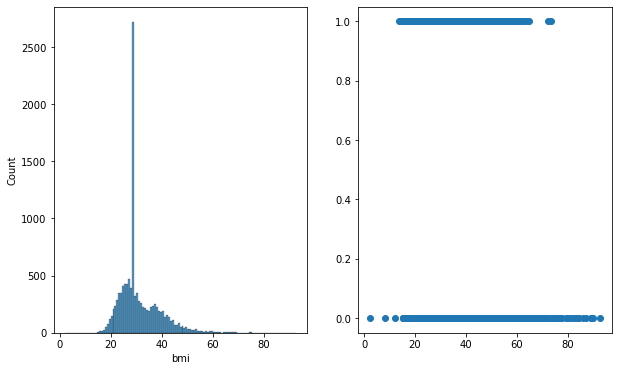

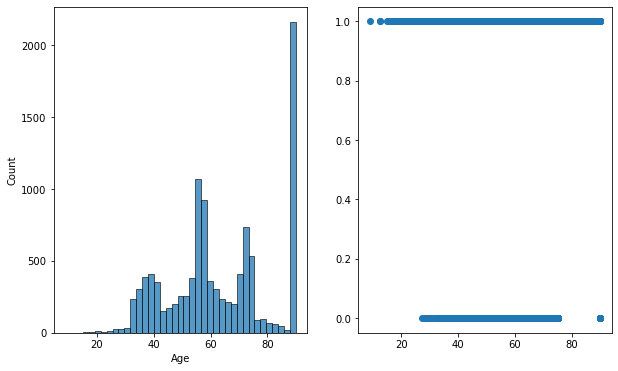

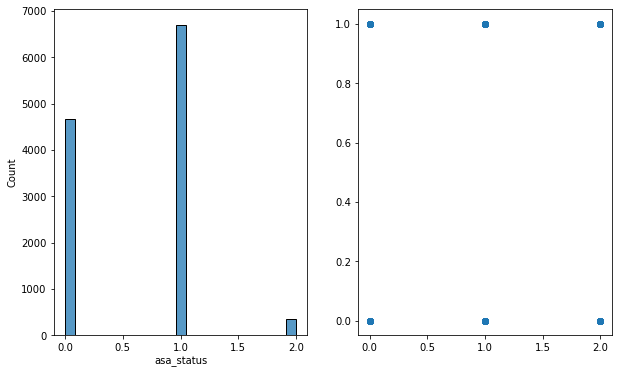

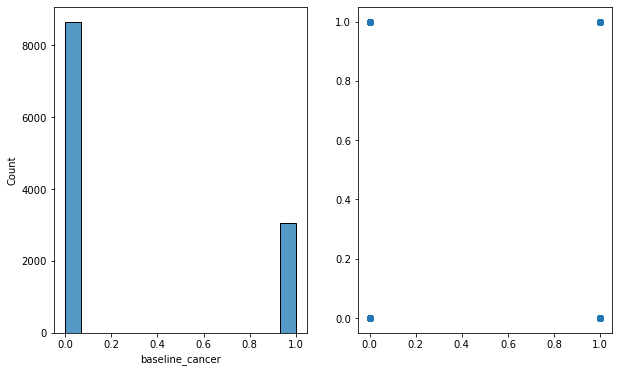

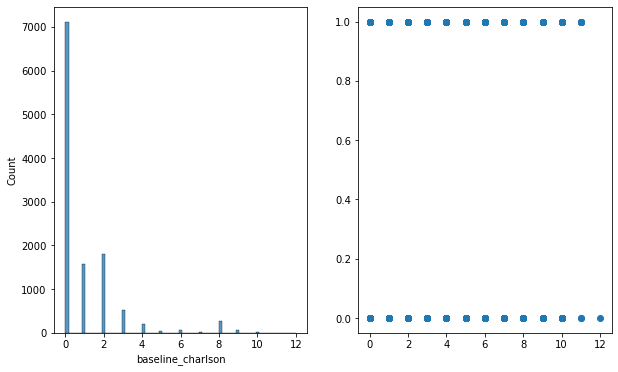

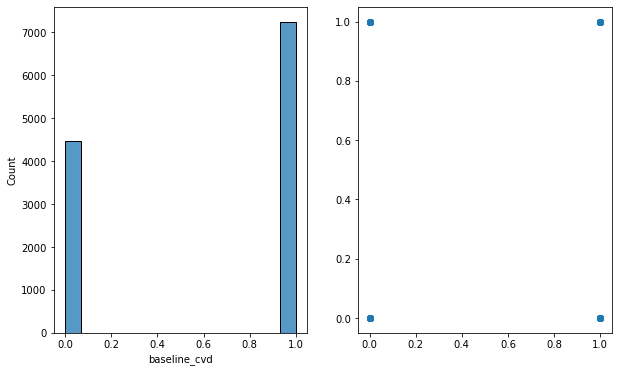

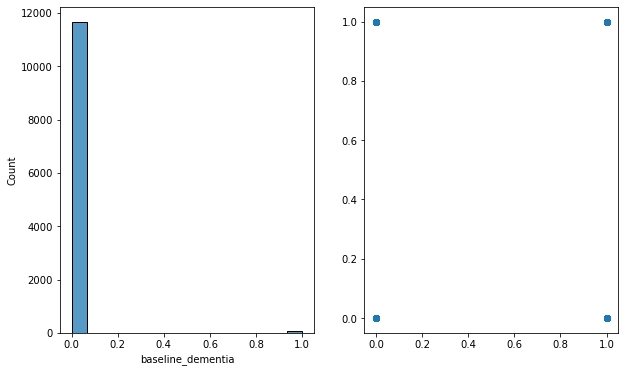

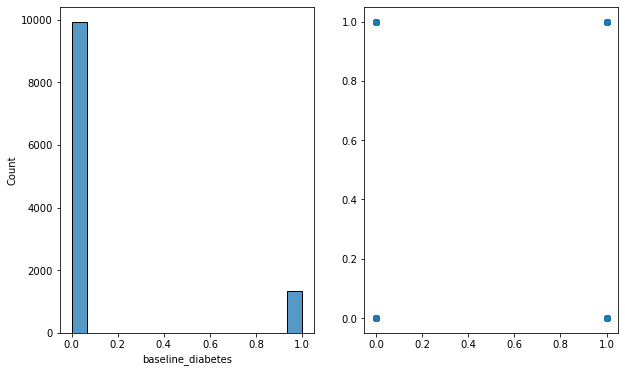

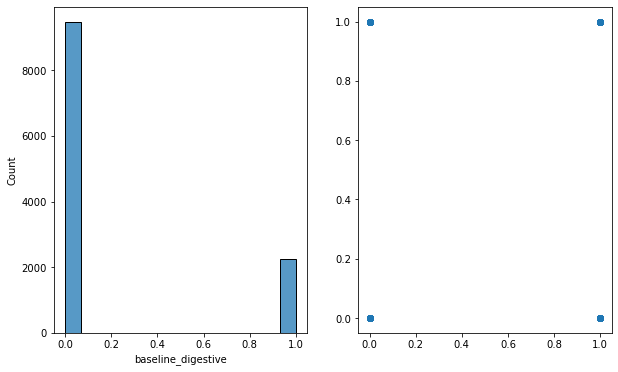

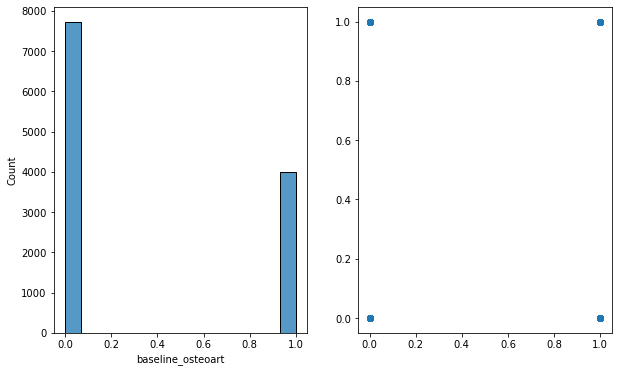

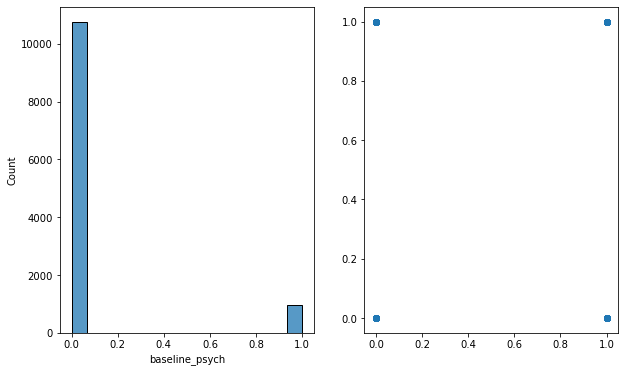

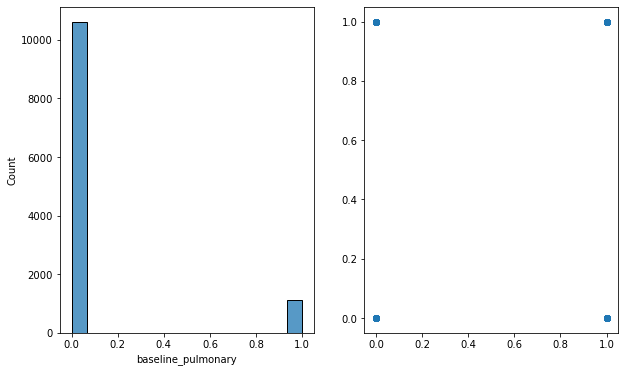

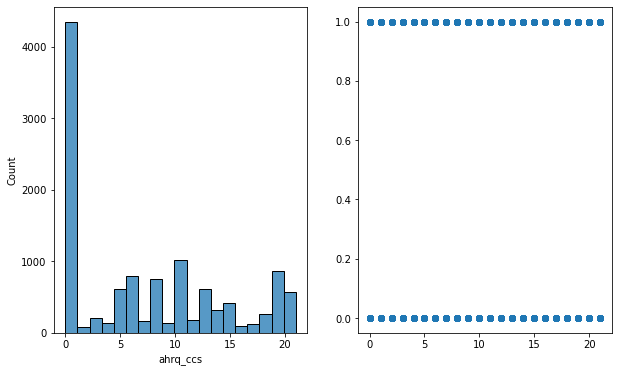

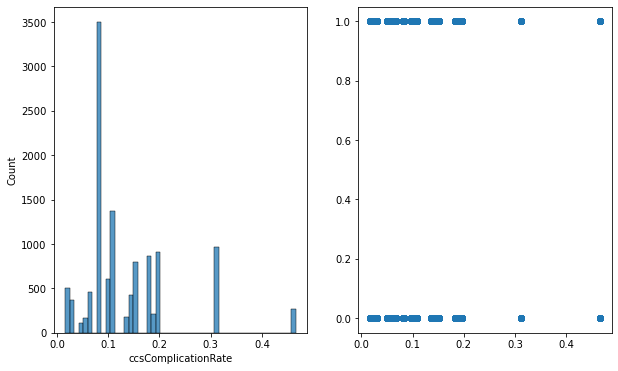

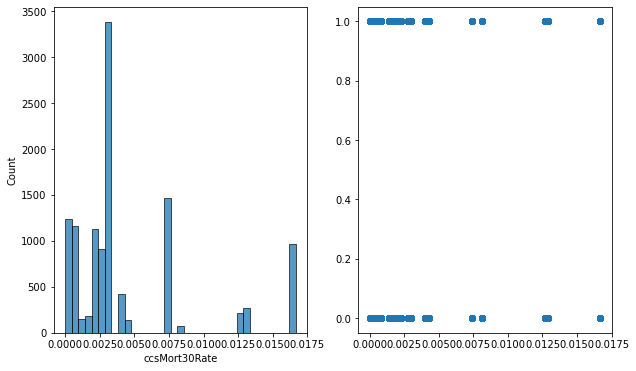

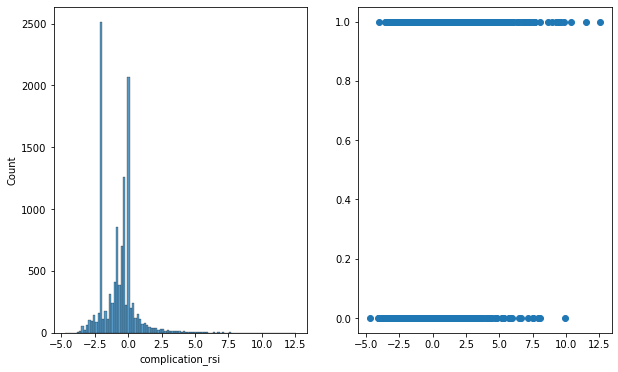

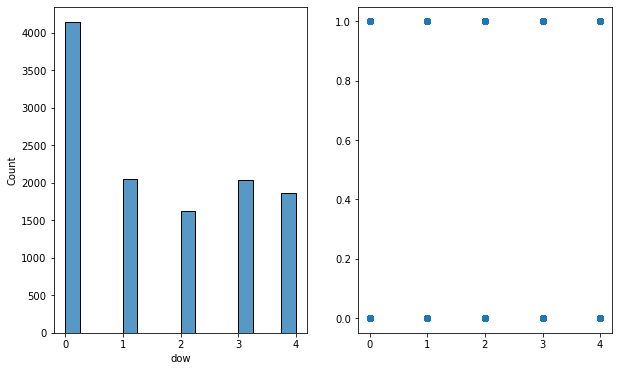

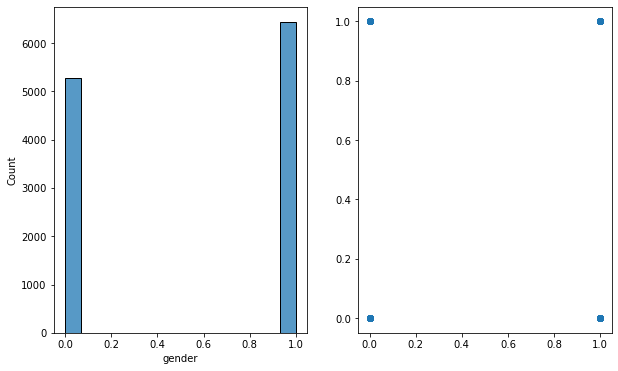

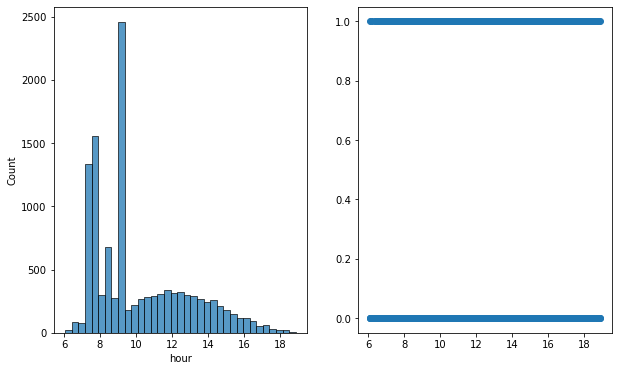

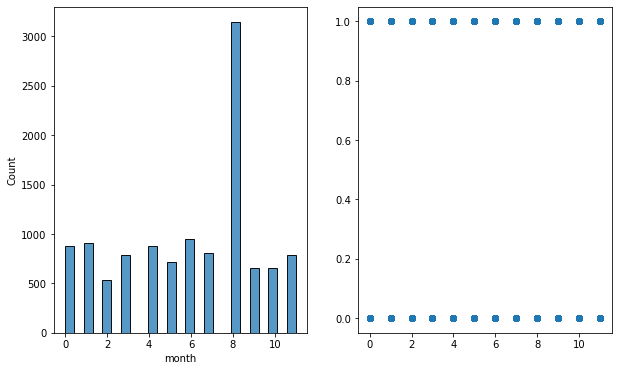

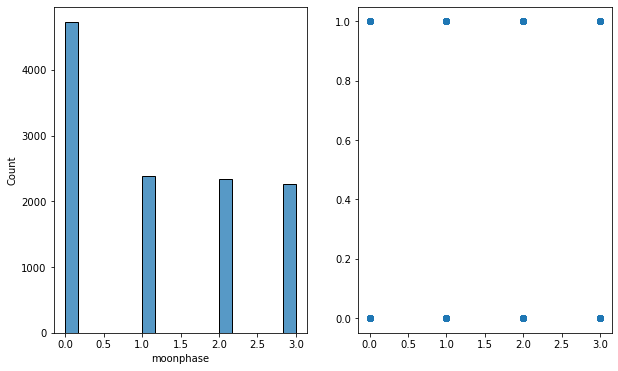

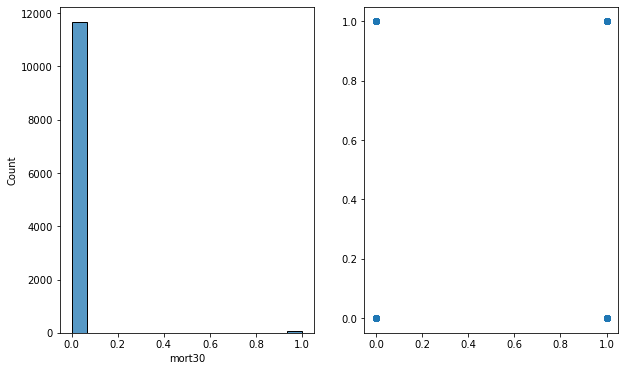

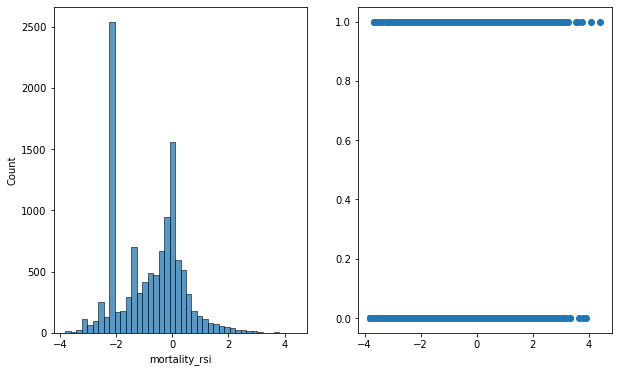

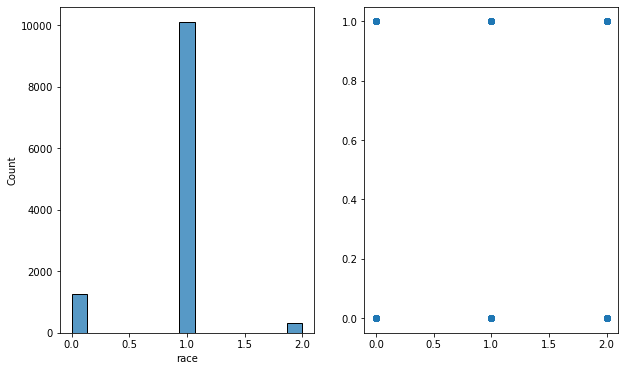

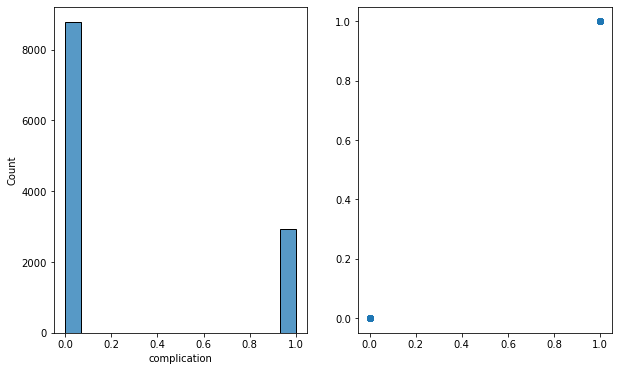

In [45]:
graphHistoScatter(datasetTraining,'complication')

### Densidad y Probabilidad de cada variable 

In [46]:
def graphProb(df, target):
    for col in df.columns:
        plt.figure(figsize=(15,6))
        #plt.subplot(121)
        sns.displot(df, x=col, kind="kde")
        plt.show()
        #plt.subplot(122)
        stats.probplot(df[col],dist="norm",plot=plt)
        plt.show()

<Figure size 1080x432 with 0 Axes>

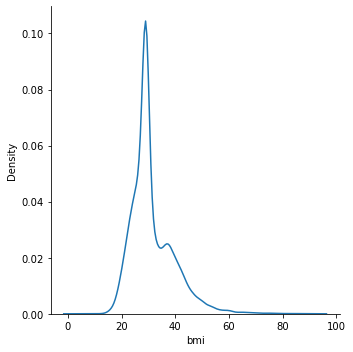

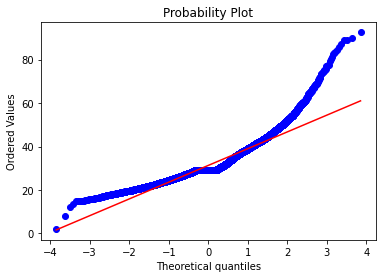

<Figure size 1080x432 with 0 Axes>

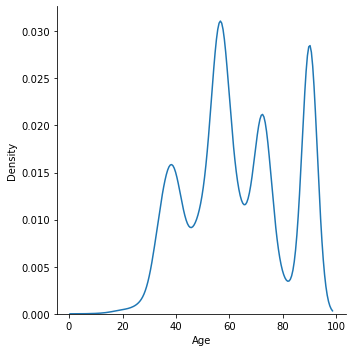

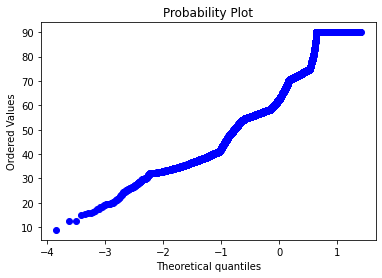

<Figure size 1080x432 with 0 Axes>

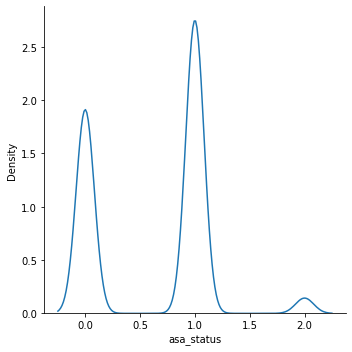

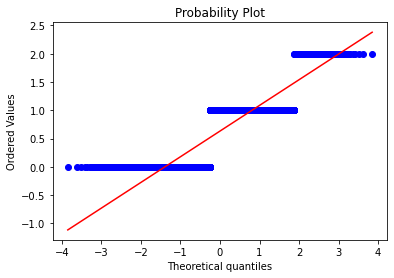

<Figure size 1080x432 with 0 Axes>

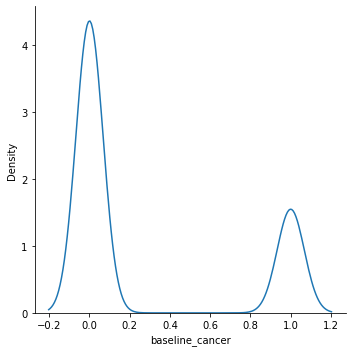

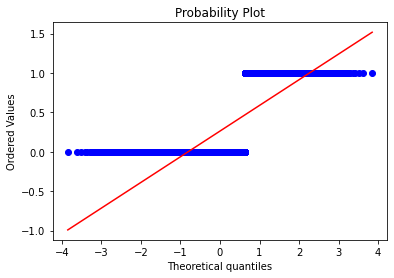

<Figure size 1080x432 with 0 Axes>

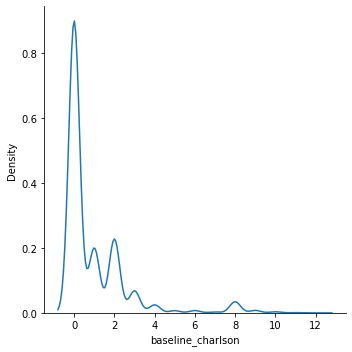

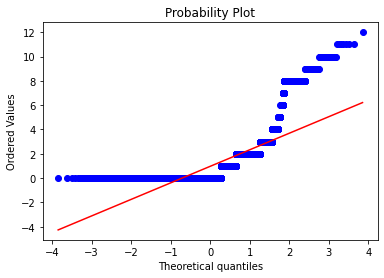

<Figure size 1080x432 with 0 Axes>

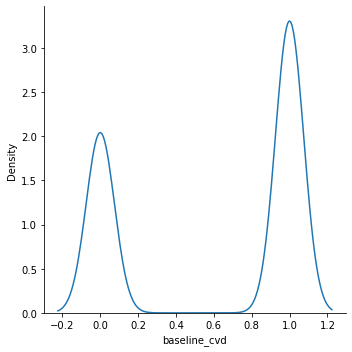

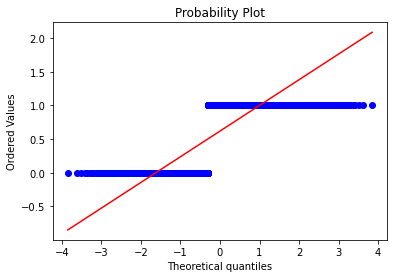

<Figure size 1080x432 with 0 Axes>

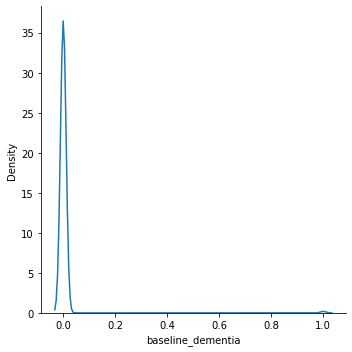

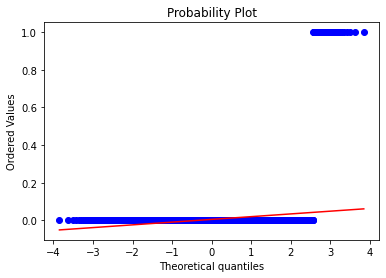

<Figure size 1080x432 with 0 Axes>

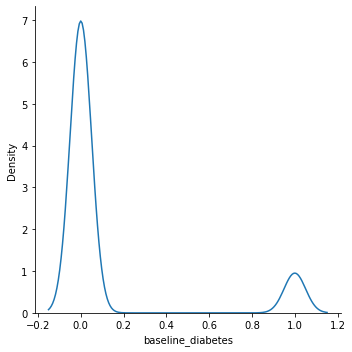

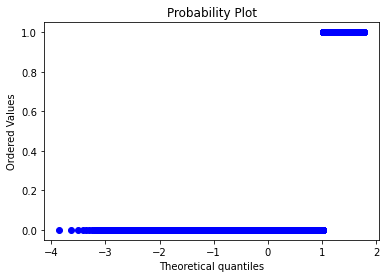

<Figure size 1080x432 with 0 Axes>

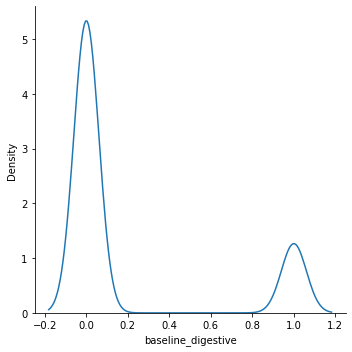

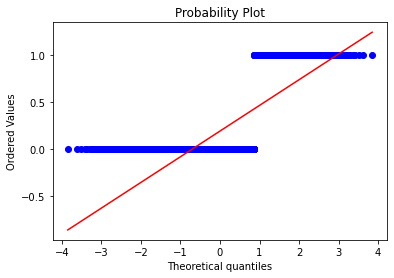

<Figure size 1080x432 with 0 Axes>

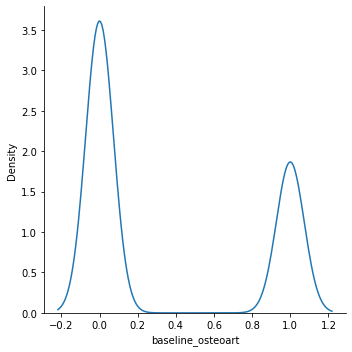

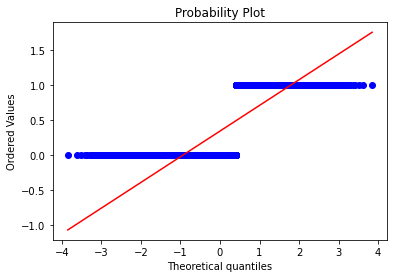

<Figure size 1080x432 with 0 Axes>

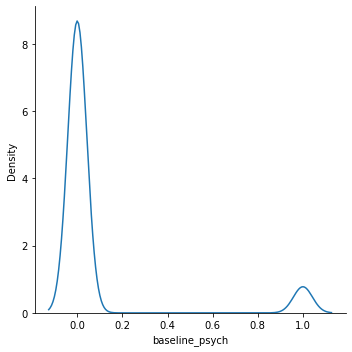

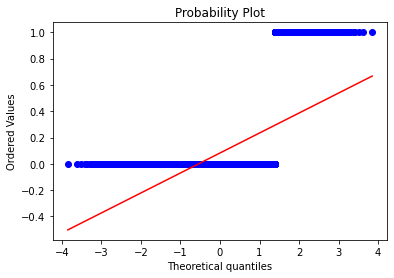

<Figure size 1080x432 with 0 Axes>

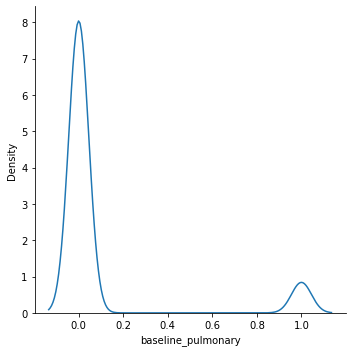

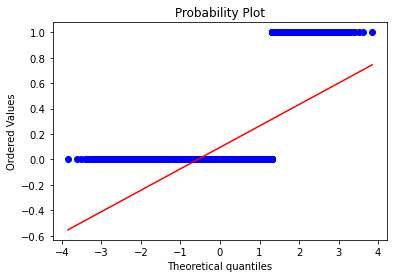

<Figure size 1080x432 with 0 Axes>

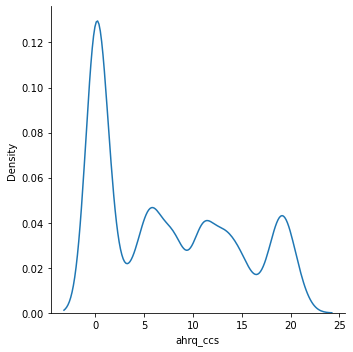

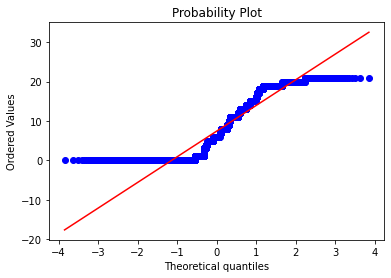

<Figure size 1080x432 with 0 Axes>

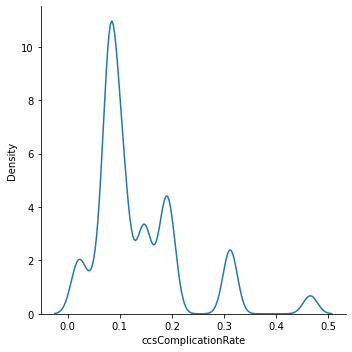

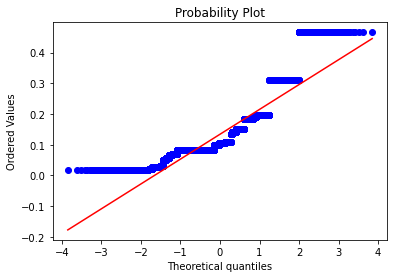

<Figure size 1080x432 with 0 Axes>

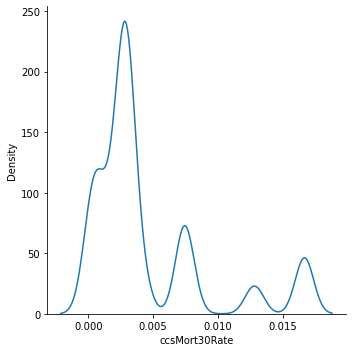

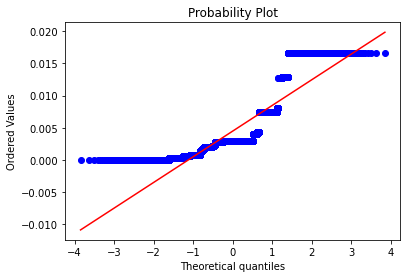

<Figure size 1080x432 with 0 Axes>

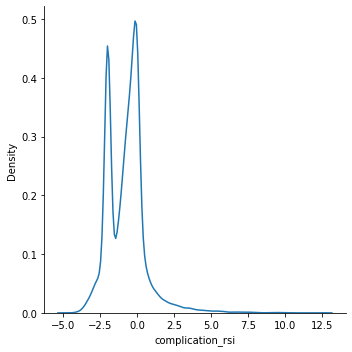

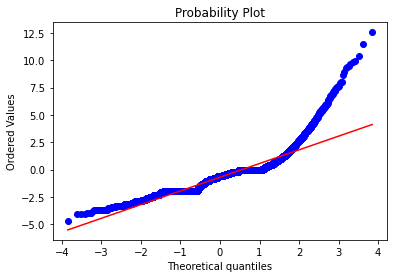

<Figure size 1080x432 with 0 Axes>

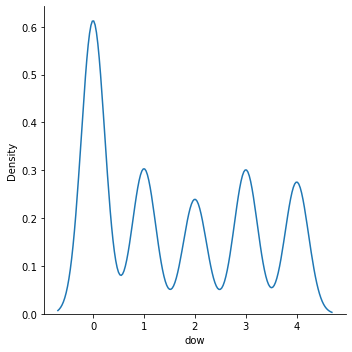

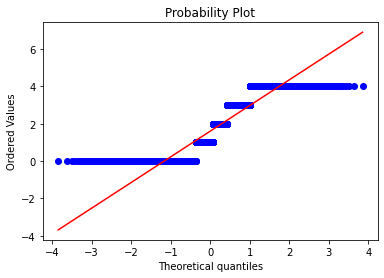

<Figure size 1080x432 with 0 Axes>

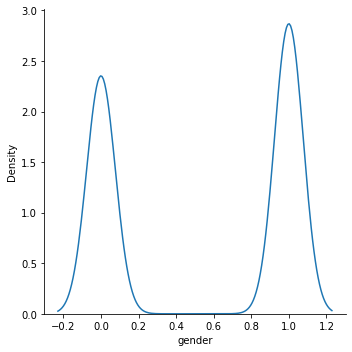

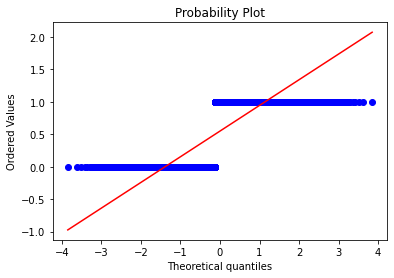

<Figure size 1080x432 with 0 Axes>

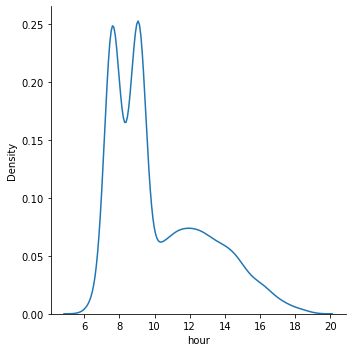

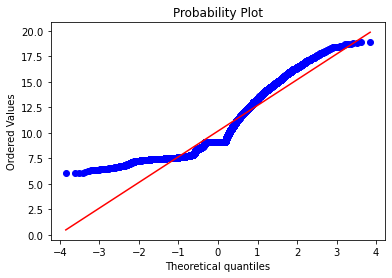

<Figure size 1080x432 with 0 Axes>

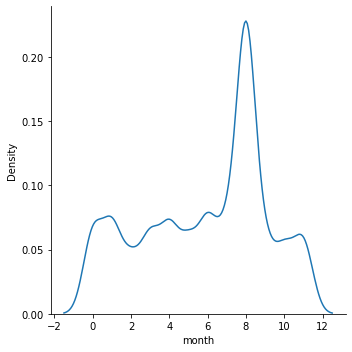

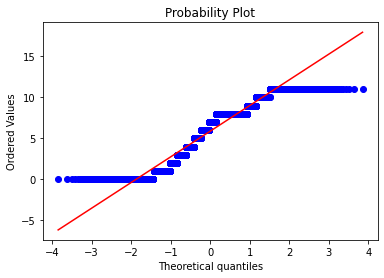

<Figure size 1080x432 with 0 Axes>

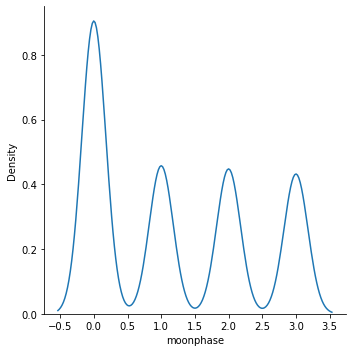

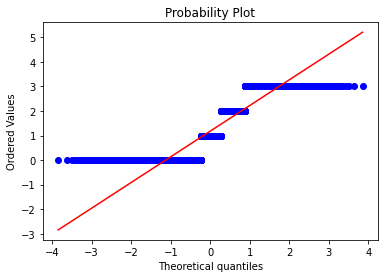

<Figure size 1080x432 with 0 Axes>

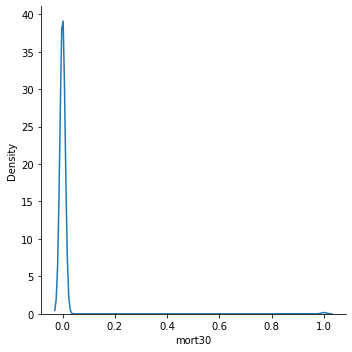

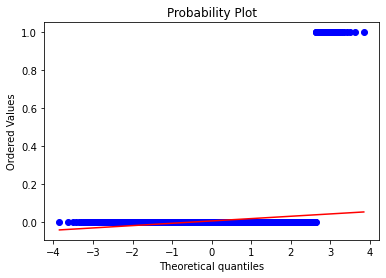

<Figure size 1080x432 with 0 Axes>

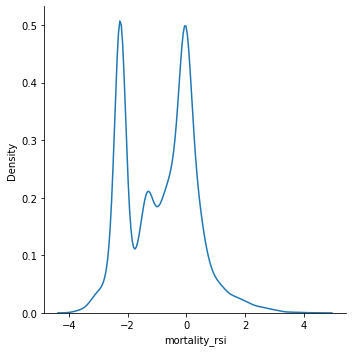

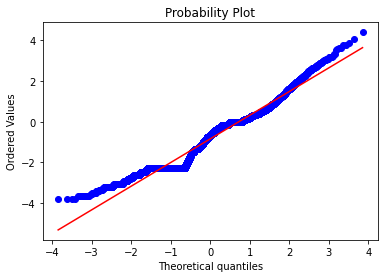

<Figure size 1080x432 with 0 Axes>

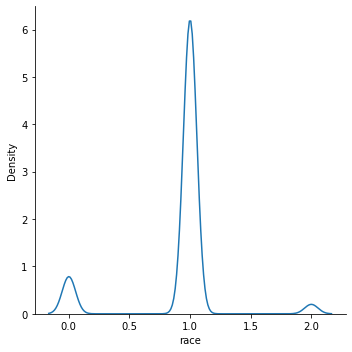

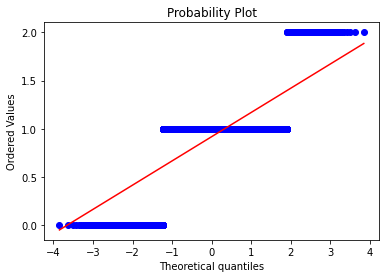

<Figure size 1080x432 with 0 Axes>

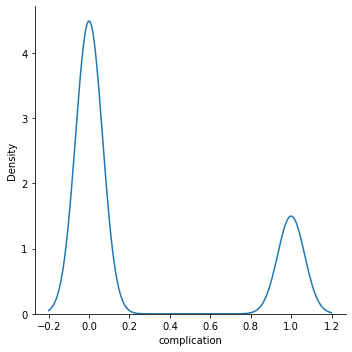

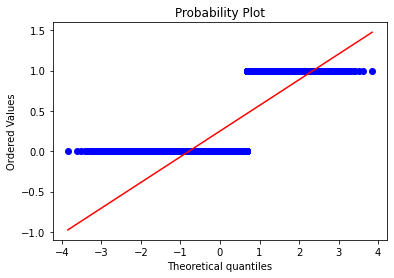

In [47]:
graphProb(datasetTraining,'complication')

### Correlación entre cada variable 

In [48]:
def calcCorrCoef(df, target):
    for col in df.columns:
        print('Correlación - ' + col + ':', df[target].corr(df[col], method='pearson'))

In [49]:
calcCorrCoef(datasetTraining,'complication')

Correlación - bmi: -0.1428299868456476
Correlación - Age: -0.1119890345908052
Correlación - asa_status: -0.005432367735312492
Correlación - baseline_cancer: 0.16196865866419322
Correlación - baseline_charlson: 0.17895743513659237
Correlación - baseline_cvd: -0.09420041523344867
Correlación - baseline_dementia: 0.0535636688292381
Correlación - baseline_diabetes: 0.019708909519596078
Correlación - baseline_digestive: 0.05144486132369844
Correlación - baseline_osteoart: -0.27529276980277806
Correlación - baseline_psych: 0.004308448204252102
Correlación - baseline_pulmonary: 0.03618534418990878
Correlación - ahrq_ccs: 0.13730545172803987
Correlación - ccsComplicationRate: 0.3988726251338764
Correlación - ccsMort30Rate: 0.28710330241576304
Correlación - complication_rsi: 0.37019338827269105
Correlación - dow: 0.1616975412083112
Correlación - gender: -0.06128727382206575
Correlación - hour: 0.07296181498957634
Correlación - month: -0.09792259069128453
Correlación - moonphase: 0.1607712175825